## Lab 8.3.1 - Fitting Classification Trees

I follow 
[JWarmenhoven](https://nbviewer.jupyter.org/github/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%207.ipynb)
to learn how to code the new materials

#### Notes 
Some parameters used in the decision tree are explained in sklearn
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

#### Import block

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
import pydotplus
from IPython.display import Image
from six import StringIO

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,\
    export_graphviz
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, \
    RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

Define the Print tree function for later use

In [3]:
# This function return the tree image 
def print_tree(estimator, features, class_names=None, filled=True):    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features,
                    class_names=class_names, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

#### Import data

In [4]:
data_path = 'D:\\PycharmProjects\\ISLR\\data\\'
carseats = pd.read_csv(f'{data_path}Carseats.csv').drop('Unnamed: 0', axis=1).dropna()

# Merge the High variables
carseats['High'] = pd.cut(carseats['Sales'], bins=[-1, 8, float('Inf')],
                          labels=['0','1'])

# Transform categorical variable
for i in ['ShelveLoc', 'US', 'Urban']:
    carseats[f'{i}'] = carseats[f'{i}'].astype('category').cat.codes

# First look
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [5]:
# Get X and y
X = carseats.drop(['Sales', 'High'], axis=1)
y = carseats.High

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=0)

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       236
           1       0.98      0.82      0.89       164

    accuracy                           0.92       400
   macro avg       0.93      0.90      0.91       400
weighted avg       0.92      0.92      0.92       400



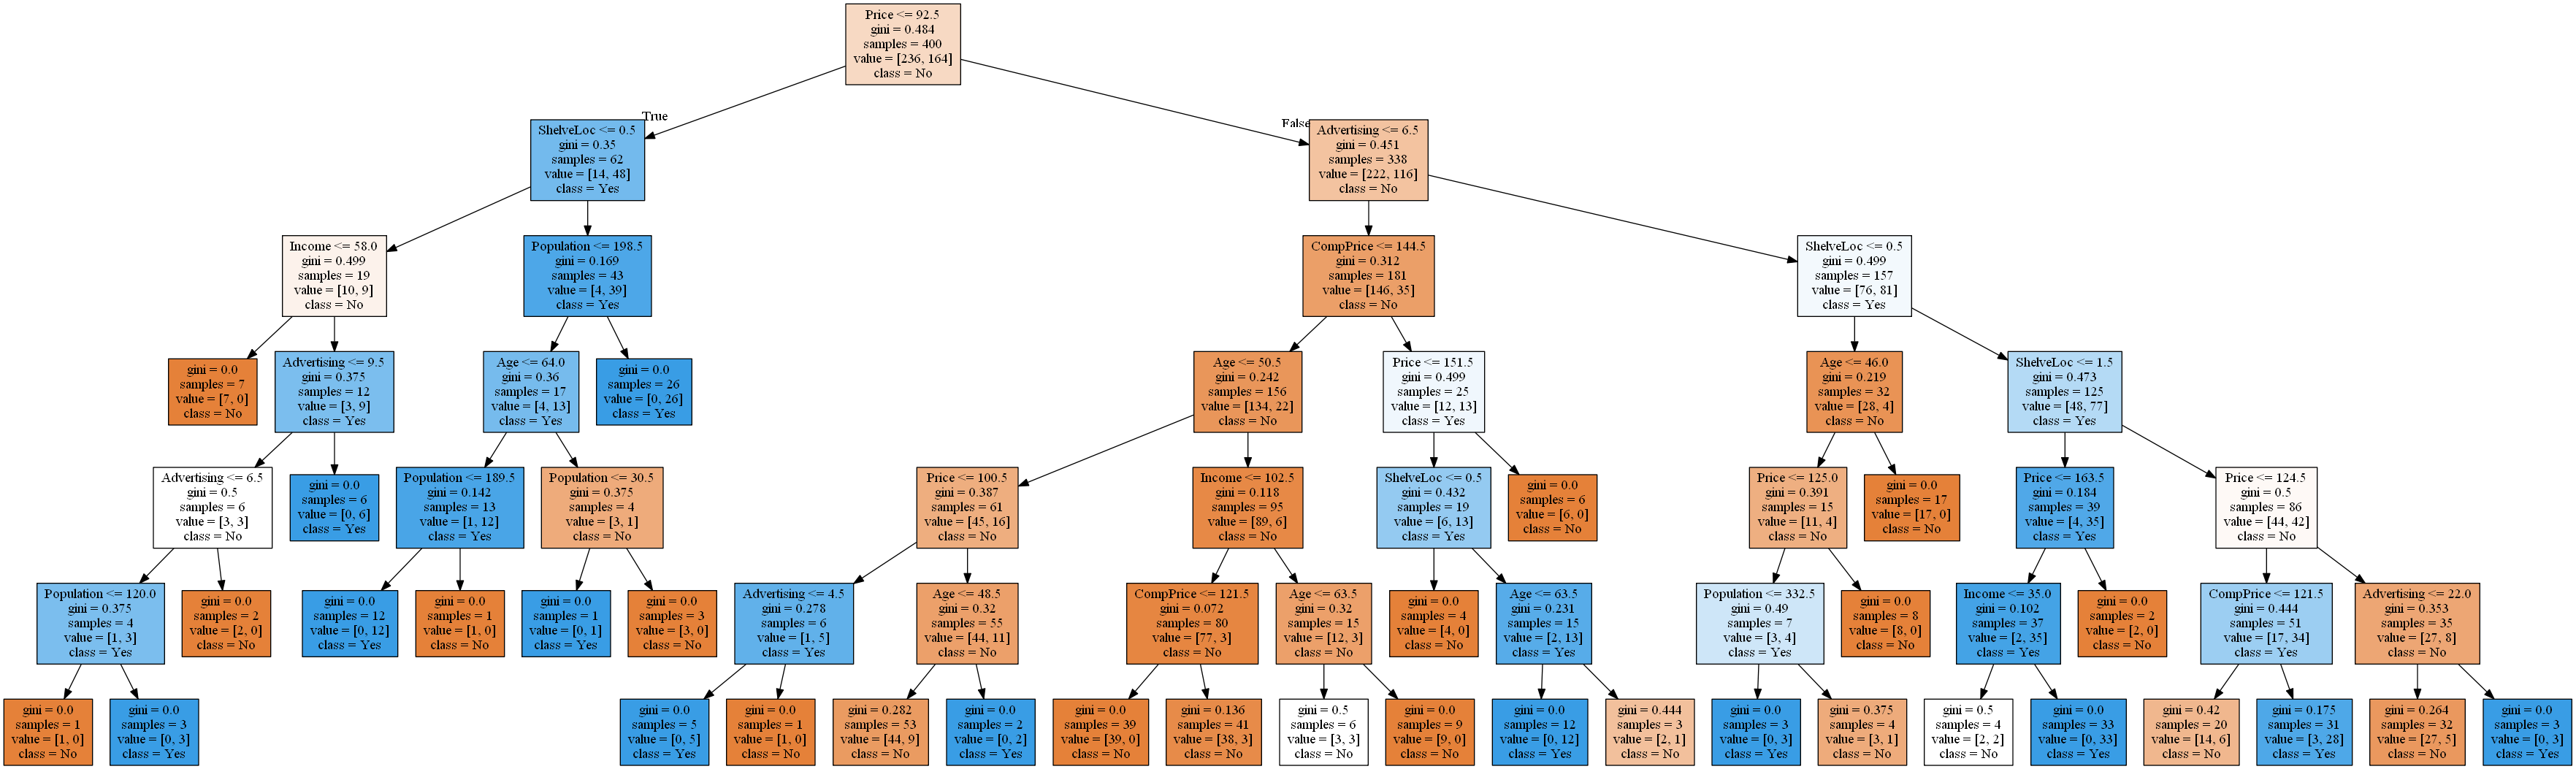

In [6]:
# Run Classification decision tree
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X, y)

# Draw out the tree
print(classification_report(y, clf.predict(X)))

# Draw tree
graph = print_tree(clf, features=X.columns, class_names=['No','Yes'])
Image(graph.create_png())

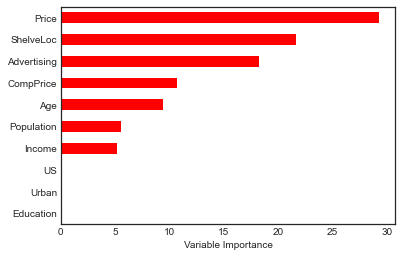

In [7]:
# Features Importance
Imp = pd.DataFrame({'Imp':clf.feature_importances_*100}, index=X.columns)
Imp.sort_values('Imp', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Now we apply validation set method to get the test error rate. The result is 
show below using the confusion matrix

In [8]:
# Prediction using training set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=['No', 'Yes'],
                  columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
print(cm, '\n')

# Report
print(classification_report(y_test, y_pred))

True        No  Yes
Predicted          
No         101   32
Yes         17   50 

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       118
           1       0.75      0.61      0.67        82

    accuracy                           0.76       200
   macro avg       0.75      0.73      0.74       200
weighted avg       0.75      0.76      0.75       200



We achieve a roughly 75% accuracy with 85% specificity.

Notes: Since I am following the author of the notebook, pruning is not implemented. 

## Lab 8.3.2 - Fitting Regression Tree

In [9]:
# Read data
df = pd.read_csv(f'{data_path}Boston.csv')
df.info()
 
# Get X and y
X = df.drop('medv', axis=1)
y = df.medv

# Split train test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,
                                                    random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Running regression tree with max depth 3. No pruning is implemented

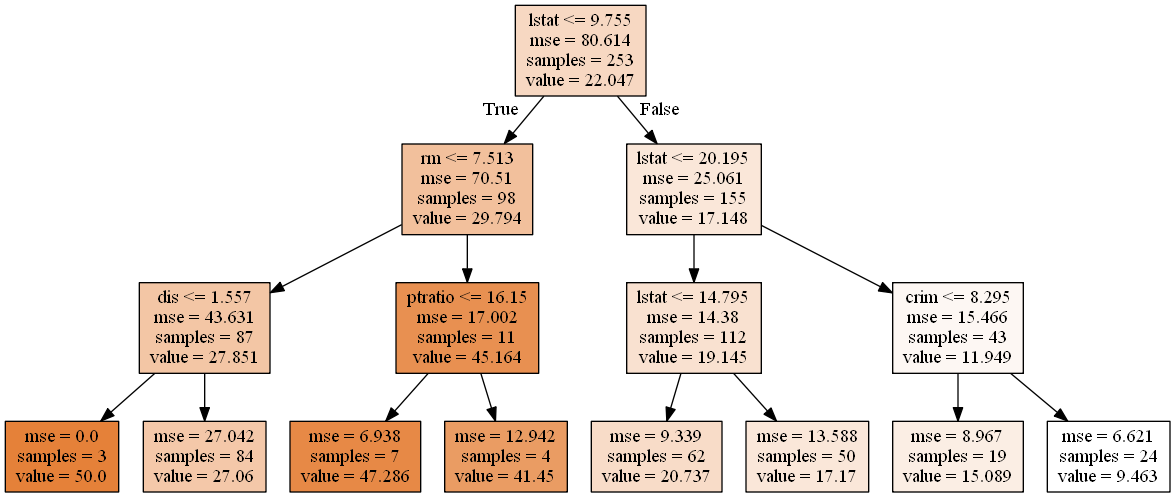

In [10]:
# regression Tree
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(X_train, y_train)

# Prediction
y_pred = regr.predict(X_test)

# Plot
graph = print_tree(regr, features=X.columns)
Image(graph.create_png())

MSE =  24.078745008158172


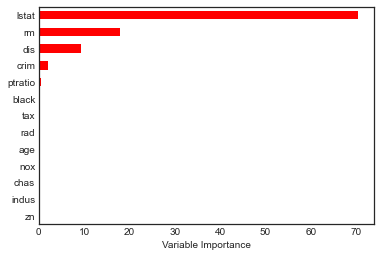

In [11]:
# Print MSE
print('MSE = ', mean_squared_error(y_test, y_pred))

# Feature Importance
Imp = pd.DataFrame({'Imp':regr.feature_importances_*100}, index=X.columns)
Imp.sort_values('Imp', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### 8.3.3 - Bagging and Random Forests

Using sklearn package to do random forest here. The dataset stays the same - Boston.

Note that bagging is simply random forest with m=p. 

First we run random forest with 13 features

MSE =  13.359405407114625


Text(0, 0.5, 'y_test')

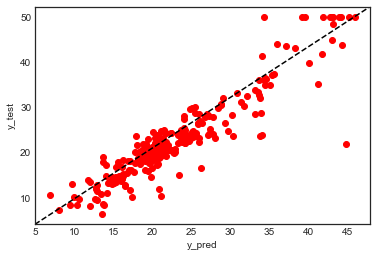

In [12]:
# random forest with 13 variables
rf = RandomForestRegressor(max_features=13, random_state=1, n_estimators=25)
rf.fit(X_train, y_train)

# prediction
y_pred = rf.predict(X_test)

# MSE
print('MSE = ', mean_squared_error(y_test, y_pred))

# plot
plt.scatter(y_pred, y_test, c='r', label='medv')
plt.plot([0,1],[0,1], linestyle='--', c='k', transform=plt.gca().transAxes)
plt.xlabel('y_pred')
plt.ylabel('y_test')

Random forest with 6 features. Note the moderate improvement in MSE of random forest


MSE =  11.657793707509882


Text(0, 0.5, 'y_test')

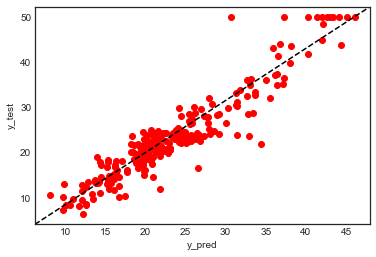

In [13]:
# Random forest with 6 features
rf = RandomForestRegressor(max_features=6, random_state=1, n_estimators=25)
rf.fit(X_train, y_train)

# prediction
y_pred = rf.predict(X_test)

# MSE
print('MSE = ', mean_squared_error(y_test, y_pred))

# Plot
plt.scatter(y_pred, y_test, c='r', label='medv')
plt.plot([0,1], [0,1], linestyle='--', c='k', transform=plt.gca().transAxes)
plt.xlabel('y_pred')
plt.ylabel('y_test')

Feature important of 6 features random forest

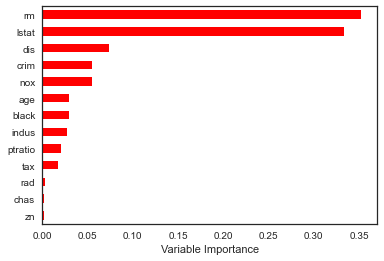

In [24]:
important = pd.DataFrame({'Importance':rf.feature_importances_}, index=X.columns)
important = important.sort_values('Importance', axis=0, ascending=True)
important.plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

#### Lab 8.3.4 - Boosting

We use GradientBoostingRegressor from sklearn to solve this part. Note that we
use 500 trees, each learns from the previous with lambda=0.01. Each tree is 
limited to the depth of 4. 

We achieve a very good test MSE of 10.67

In [15]:
# Fit Boosting
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, 
                                max_depth=4, random_state=1)
gbr.fit(X_train, y_train)

# Prediction
y_pred = gbr.predict(X_test)
print('MSE = ', mean_squared_error(y_test, y_pred))

MSE =  10.670144325150716


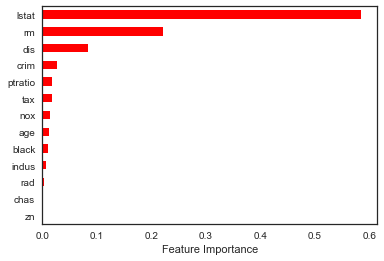

In [23]:
importance = pd.DataFrame({'importance':gbr.feature_importances_}, index=X.columns)
importance = importance.sort_values('importance', axis=0, ascending=True)
importance.plot(kind='barh', color='r')
plt.xlabel('Feature Importance')
plt.gca().legend_ = None

The result is the same with many methods we used in the past: lstat, rm and dis
are the most defining features in predicting medv.